# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_csv/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['qaanaaq',
 'kavieng',
 'galveston',
 'roald',
 'kaoma',
 'albany',
 'busselton',
 'mar del plata',
 'nemuro',
 'hermanus',
 'hamilton',
 'grindavik',
 'jalu',
 'ilulissat',
 'hilo',
 'ushuaia',
 'belushya guba',
 'hobart',
 'vardo',
 'dikson',
 'yaan',
 'vaini',
 'meulaboh',
 'mataura',
 'avarua',
 'punta arenas',
 'ardakan',
 'chuy',
 'selikhino',
 'bilma',
 'nikolskoye',
 'port elizabeth',
 'saint-philippe',
 'barentsburg',
 'bluff',
 'bethel',
 'bairiki',
 'bredasdorp',
 'seoul',
 'mys shmidta',
 'faanui',
 'kaeo',
 'torbay',
 'santa cruz',
 'northam',
 'ponta do sol',
 'los angeles',
 'rikitea',
 'atuona',
 'elko',
 'fortuna',
 'hithadhoo',
 'rafaela',
 'shenjiamen',
 'san patricio',
 'sioux lookout',
 'uwayl',
 'santa rosa',
 'kavaratti',
 'saint george',
 'pochutla',
 'tasiilaq',
 'carnarvon',
 'bengkulu',
 'yulara',
 'nusaybin',
 'klaksvik',
 'tashigang',
 'tymovskoye',
 'chokurdakh',
 'sinnamary',
 'poyarkovo',
 'longlac',
 'biak',
 'vila',
 'kapaa',
 'sao filipe',
 'saleaula

In [3]:
print(len(cities))

615


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url - found on https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


#create lists
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Set loop
i = 1
for city in cities:
    time.sleep(1)
    city=city
    query_url = url + "&q=" + city.replace(" ","+")
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"])
        
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|qaanaaq
Processing record 2|kavieng
Processing record 3|galveston
Processing record 4|roald
Processing record 5|kaoma
Processing record 6|albany
Processing record 7|busselton
Processing record 8|mar del plata
Processing record 9|nemuro
Processing record 10|hermanus
Processing record 11|hamilton
Processing record 12|grindavik
Processing record 13|jalu
Processing record 14|ilulissat
Processing record 15|hilo
Processing record 16|ushuaia
City not found. Skipping.
Processing record 17|hobart
Processing record 18|vardo
Processing record 19|dikson
Processing record 20|yaan
Processing record 21|vaini
Processing record 22|meulaboh
Processing record 23|mataura
Processing record 24|avarua
Processing record 25|punta arenas
Processing record 26|ardakan
Processing record 27|chuy
Processing record 28|selikhino
Processing record 29|bilma
Processing record 30|nikolskoye
Processing record 31|port elizabeth
Processing record 32|saint-philippe
City not found. Skipping.
Processing reco

Processing record 248|tomatlan
Processing record 249|severo-kurilsk
Processing record 250|smithers
Processing record 251|catamarca
Processing record 252|mumford
Processing record 253|todos santos
City not found. Skipping.
Processing record 254|henties bay
City not found. Skipping.
Processing record 255|saint-francois
Processing record 256|krasnoselkup
Processing record 257|beisfjord
Processing record 258|la ronge
Processing record 259|udachnyy
Processing record 260|vilhena
Processing record 261|alappuzha
Processing record 262|oussouye
Processing record 263|karakol
Processing record 264|dhidhdhoo
Processing record 265|baykit
Processing record 266|honningsvag
Processing record 267|yatou
Processing record 268|nelson bay
Processing record 269|evensk
Processing record 270|liverpool
City not found. Skipping.
Processing record 271|bowen
Processing record 272|valparaiso
Processing record 273|muros
Processing record 274|shahr-e babak
Processing record 275|siniscola
Processing record 276|tongren

Processing record 490|nueve de julio
Processing record 491|cairns
Processing record 492|eureka
Processing record 493|kolobrzeg
Processing record 494|kutum
Processing record 495|el dorado
Processing record 496|tarauaca
Processing record 497|conde
Processing record 498|abong mbang
Processing record 499|blankenberge
Processing record 500|marsh harbour
Processing record 501|lantawan
Processing record 502|khani
Processing record 503|neiafu
Processing record 504|tiznit
Processing record 505|kaliua
Processing record 506|senj
Processing record 507|pimentel
Processing record 508|ayan
Processing record 509|booue
City not found. Skipping.
Processing record 510|husavik
Processing record 511|jinchang
Processing record 512|oistins
Processing record 513|luganville
Processing record 514|ginir
Processing record 515|udimskiy
Processing record 516|khandyga
City not found. Skipping.
Processing record 517|tambilil
Processing record 518|plaisance-du-touch
Processing record 519|mount gambier
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create Dataframe
weather_df = {
    "City":city_name,
    "Lat":lat,
    "Long":long,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,
}


#Display DF
weather_df =pd.DataFrame(weather_df)
weather_df



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,19.83,60,{'all': 41},7.09,GL,1633630516
1,Kavieng,-2.5744,150.7967,80.47,78,{'all': 27},4.81,PG,1633631275
2,Galveston,29.3669,-94.9669,89.20,53,{'all': 20},4.00,US,1633631276
3,Roald,62.5833,6.1333,54.91,87,{'all': 75},6.91,NO,1633631277
4,Kaoma,-14.7833,24.8000,76.82,21,{'all': 86},5.41,ZM,1633631279
...,...,...,...,...,...,...,...,...,...
556,Stokmarknes,68.5646,14.9108,42.49,65,{'all': 40},8.05,NO,1633632087
557,Inhambane,-23.8650,35.3833,69.78,73,{'all': 20},4.61,MZ,1633632090
558,Teknāf,20.8624,92.3058,79.52,89,{'all': 91},4.25,BD,1633632092
559,Megion,61.0296,76.1136,41.02,91,{'all': 100},11.18,RU,1633632094


In [6]:
#Clean Cloudiness column
clean_cloudiness_list=[]

for cloudiness in list(weather_df["Cloudiness"].values):
    clean_cloudiness_list.append(int(dict(cloudiness)["all"]))
    
weather_df["Cloudiness"]=clean_cloudiness_list
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,19.83,60,41,7.09,GL,1633630516
1,Kavieng,-2.5744,150.7967,80.47,78,27,4.81,PG,1633631275
2,Galveston,29.3669,-94.9669,89.20,53,20,4.00,US,1633631276
3,Roald,62.5833,6.1333,54.91,87,75,6.91,NO,1633631277
4,Kaoma,-14.7833,24.8000,76.82,21,86,5.41,ZM,1633631279
...,...,...,...,...,...,...,...,...,...
556,Stokmarknes,68.5646,14.9108,42.49,65,40,8.05,NO,1633632087
557,Inhambane,-23.8650,35.3833,69.78,73,20,4.61,MZ,1633632090
558,Teknāf,20.8624,92.3058,79.52,89,91,4.25,BD,1633632092
559,Megion,61.0296,76.1136,41.02,91,100,11.18,RU,1633632094


In [7]:
weather_df= weather_df.rename_axis('City ID')

#Exporting data to csv
weather_df.to_csv("output_csv/city.csv")

In [8]:
#Display humidity *to look for anything above 100%
humidity

[60,
 78,
 53,
 87,
 21,
 70,
 77,
 66,
 87,
 72,
 74,
 93,
 24,
 50,
 77,
 43,
 73,
 80,
 90,
 83,
 94,
 89,
 96,
 69,
 29,
 21,
 50,
 60,
 15,
 55,
 94,
 78,
 90,
 71,
 78,
 85,
 91,
 75,
 96,
 48,
 37,
 89,
 74,
 79,
 78,
 76,
 62,
 69,
 74,
 20,
 85,
 37,
 64,
 89,
 79,
 48,
 56,
 50,
 77,
 90,
 59,
 19,
 91,
 93,
 83,
 90,
 67,
 91,
 82,
 68,
 78,
 78,
 42,
 81,
 16,
 84,
 43,
 90,
 70,
 66,
 62,
 47,
 88,
 54,
 69,
 71,
 88,
 63,
 95,
 16,
 92,
 61,
 94,
 27,
 88,
 84,
 86,
 76,
 80,
 93,
 65,
 80,
 62,
 60,
 100,
 93,
 100,
 73,
 98,
 91,
 64,
 82,
 81,
 83,
 73,
 88,
 74,
 100,
 89,
 72,
 57,
 93,
 90,
 85,
 98,
 91,
 100,
 93,
 55,
 80,
 43,
 67,
 95,
 94,
 98,
 86,
 66,
 77,
 94,
 89,
 33,
 43,
 83,
 72,
 88,
 87,
 83,
 95,
 86,
 95,
 87,
 64,
 86,
 81,
 73,
 68,
 91,
 64,
 85,
 55,
 87,
 87,
 70,
 72,
 70,
 90,
 71,
 47,
 73,
 45,
 84,
 86,
 97,
 82,
 58,
 90,
 86,
 88,
 100,
 75,
 55,
 54,
 95,
 68,
 92,
 78,
 74,
 51,
 53,
 74,
 95,
 70,
 74,
 80,
 71,
 60,
 36,
 73,
 33,


In [9]:
#Statement
print("After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data")


After inspecting the data, the maximum humidity value is 100%, therefore there are no values greater than 100% in our data


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
#see above, there were none over 100%


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
##*although there was no data to clean you CAN see in the above DF that I had to clean the Cloudiness data, which demonstrates my ability to clean data


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

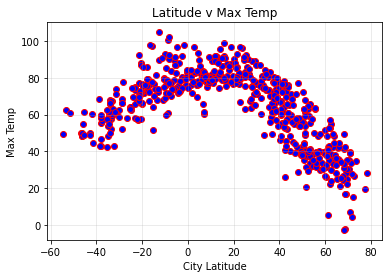

In [12]:
#Create Scatter plot for Latitude v Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "red")

#Title
plt.title ("Latitude v Max Temp")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Max Temp.png")
           
    

## Latitude vs. Humidity Plot

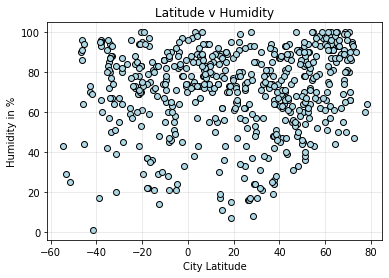

In [13]:
#Create Scatter plot for Latitude v Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#Title
plt.title ("Latitude v Humidity")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity in %")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

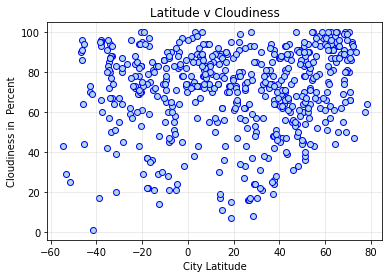

In [14]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "lightblue", edgecolor = "blue")
#Title
plt.title ("Latitude v Cloudiness")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness in  Percent")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

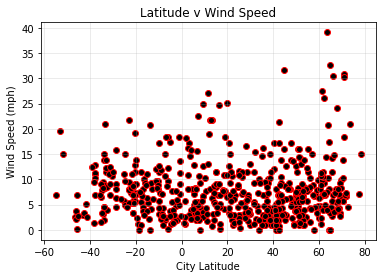

In [15]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "black", edgecolor = "red")
#Title
plt.title ("Latitude v Wind Speed")

#Set Labels
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

#Set Grid, IMO it makes it easier to see the measurements for analysis
plt.grid (linestyle='-', linewidth=.5, alpha = .5)

#Save as png
plt.savefig("Images/Latitude v Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [54]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
Southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

In [55]:
# Define function for creating linear agression and scatter plot
# Add the linear regression equation and line to plot
def linear_regression(x_values,y_values,eq_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    
    #Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_coord[0],eq_coord[1]),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [56]:
###Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8496794311960042


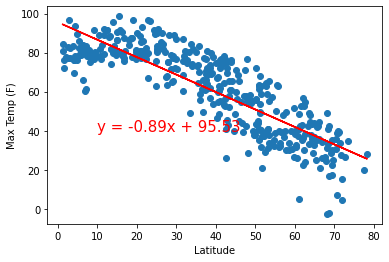

None


In [57]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]

#Label and diplay
plt.ylabel("Max Temp (F)")
print(linear_regression(x_values,y_values,[10,40]))

In [58]:
#Print Correlation
print(f'There is a negative correlation.')

There is a negative correlation.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7341995676688536


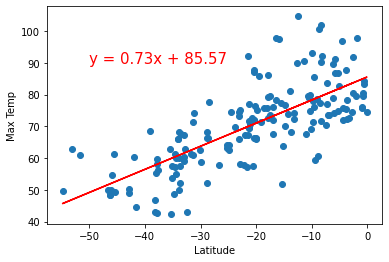

None


In [59]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]


#Label and diplay
plt.ylabel("Max Temp")
print(linear_regression(x_values,y_values,[-50,90]))



In [60]:
#Print Correlation
print(f'There is a positive correlation.')

There is a positive correlation.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15073724359890536


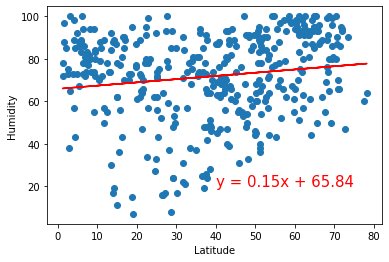

None


In [61]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]


#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values,[40,20]))


In [62]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.024750558667731976


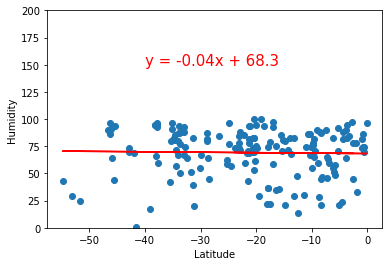

None


In [63]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")

#Label and diplay
plt.ylabel("Humidity")
print(linear_regression(x_values,y_values,[-40,150]))


In [64]:
#Print Correlation
print(f'There is a little if any correlation.')

There is a little if any correlation.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13036790265164194


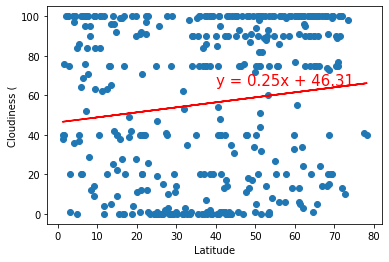

None


In [65]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]


#Label and diplay
plt.ylabel("Cloudiness (")
print(linear_regression(x_values,y_values,[40,65]))


In [66]:
#Print Correlation
print(f'There is a slight positive correlation.')

There is a slight positive correlation.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07573933948394039


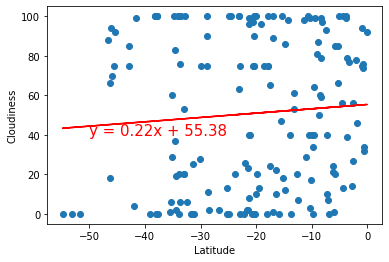

None


In [67]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]

#Label and diplay
plt.ylabel("Cloudiness")
print(linear_regression(x_values,y_values,[-50,40]))

In [68]:
#Print Correlation
print(f'There is a barely a positive correlation.')

There is a barely a positive correlation.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07859645388405638


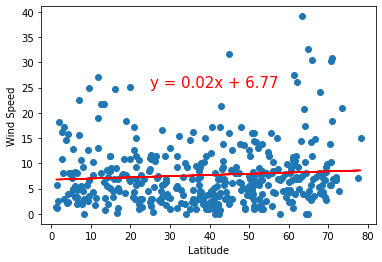

None


In [69]:
#Define X and Y
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values,[25,25]))

In [70]:
#Print Correlation
print(f'There is a weak positive correlation.')

There is a weak positive correlation.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.05467531159936582


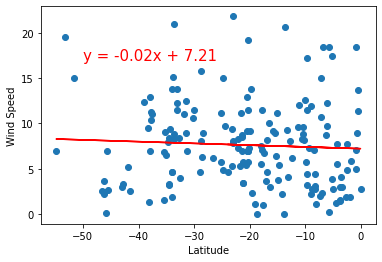

None


In [71]:
#Define X and Y
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]

#Label and diplay
plt.ylabel("Wind Speed")
print(linear_regression(x_values,y_values,[-50,17]))

In [72]:
#Print Correlation
print(f'There is a weak negative correlation.')

There is a weak negative correlation.
